### QUESTION:
How is the average Salary and JobSatisfaction distributed by the wished WorkStart?

#### Additional:
In the output, sort the chart by workstart-time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import create_mixed_plot

df = pd.read_csv('./data/survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1.** Selected only necessary columns

In [2]:
workstart_df = df[['WorkStart', 'Salary', 'JobSatisfaction']]
workstart_df

,WorkStart,Salary,JobSatisfaction
0,6:00 AM,NaN,NaN
1,10:00 AM,NaN,NaN
2,9:00 AM,113750.0,9.0
3,9:00 AM,NaN,3.0
4,NaN,NaN,8.0
...,...,...,...
51387,9:00 AM,58000.0,3.0
51388,8:00 AM,NaN,NaN
51389,NaN,NaN,10.0
51390,2:00 PM,40000.0,7.0


**2.** Drop the NaN-values

In [3]:
workstart_df = workstart_df.dropna().reset_index()

**3.** Lets have a look at the dataframe and the counts

In [4]:
workstart_df['WorkStart'].value_counts()

9:00 AM     3177
10:00 AM    3049
8:00 AM     2497
7:00 AM     1207
11:00 AM     741
6:00 AM      395
Noon         299
1:00 PM      117
2:00 PM      111
5:00 AM       75
6:00 PM       58
8:00 PM       57
10:00 PM      47
3:00 PM       39
4:00 PM       36
9:00 PM       31
4:00 AM       29
5:00 PM       23
7:00 PM       23
11:00 PM      15
1:00 AM       12
3:00 AM        9
Midnight       8
2:00 AM        7
Name: WorkStart, dtype: int64

**4.** Create a custom dataframe which in the following will be used to map the id in the correct order

In [5]:
workstart_id_df = pd.DataFrame( 
    {
        "id": [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
        "WorkStart": ["Midnight","1:00 AM","2:00 AM","3:00 AM","4:00 AM","5:00 AM","6:00 AM","7:00 AM","8:00 AM","9:00 AM","10:00 AM","11:00 AM","Noon","1:00 PM","2:00 PM","3:00 PM","4:00 PM","5:00 PM","6:00 PM","7:00 PM","8:00 PM","9:00 PM","10:00 PM","11:00 PM"]
    })
merged_df = pd.merge(workstart_id_df, workstart_df, on="WorkStart")
merged_df = merged_df.sort_values(['id'])

In [6]:
merged_df

,id,WorkStart,index,Salary,JobSatisfaction
0,0,Midnight,10339,18352.664807,3.0
1,0,Midnight,13496,37878.787879,10.0
2,0,Midnight,13532,5285.567464,8.0
3,0,Midnight,25249,26370.370370,5.0
4,0,Midnight,27561,10277.492292,8.0
...,...,...,...,...,...
12049,23,11:00 PM,12355,2114.226986,5.0
12047,23,11:00 PM,9804,135000.000000,7.0
12060,23,11:00 PM,48818,4404.639554,10.0
12053,23,11:00 PM,36229,5285.567464,6.0


**5.** Show all calculated average job-satisfaction and sort them in descending order

In [7]:
merged_df.groupby(['id','WorkStart'])['JobSatisfaction'].mean().reset_index(name='mean').sort_values(['mean'], ascending=False)

,id,WorkStart,mean
0,0,Midnight,7.750000
15,15,3:00 PM,7.692308
5,5,5:00 AM,7.253333
17,17,5:00 PM,7.043478
8,8,8:00 AM,7.034041
16,16,4:00 PM,7.000000
11,11,11:00 AM,6.998650
9,9,9:00 AM,6.992446
13,13,1:00 PM,6.991453
7,7,7:00 AM,6.985087


**6.** Show all calculated average salaries and sort them in descending order

In [8]:
merged_df.groupby(['id','WorkStart'])['Salary'].mean().reset_index(name='mean').sort_values(['mean'], ascending=False)

,id,WorkStart,mean
5,5,5:00 AM,67672.373059
6,6,6:00 AM,64509.867794
7,7,7:00 AM,64158.206762
4,4,4:00 AM,59707.399313
10,10,10:00 AM,58902.492975
15,15,3:00 PM,58292.050119
8,8,8:00 AM,56499.915177
9,9,9:00 AM,56025.601719
13,13,1:00 PM,55682.504113
11,11,11:00 AM,55003.257586


**7.** Show a plot with the dataframe as a basis

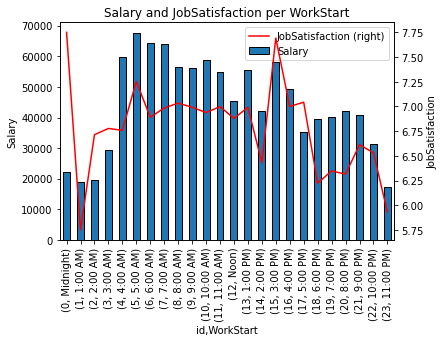

In [9]:
plt = create_mixed_plot(dataframe=merged_df, groupby=["id", "WorkStart"], primary_measure='Salary', \
                        secondary_measure='JobSatisfaction', title='Salary and JobSatisfaction per WorkStart')
plt.show()

### Answer:
The highest average salary (at **~67,672.37**) is for the ones who would start working at 5am
The lowest average salary (at **~17,260.19**) is for the ones who would start working at 11pm
The highest job-satisfaction (at **7.75**) is at midnight although the Salary is pretty low (compared to the rest)
As shown in the plot, people who whould like to start at 1am do have in average the lowest job-satisfaction with **5.75**. 
The group who would like to start at 1am also has the second-lowest salary with **18,824.08**.